### Customer Churn Prediction

In [1]:
# load the packages
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
# load the data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Understanding the data here each row is a customer and each column is a feature of the customer. The target variable is 'Churn', which indicates whether the customer has churned or not.

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information - how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
# data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing Values

<Axes: >

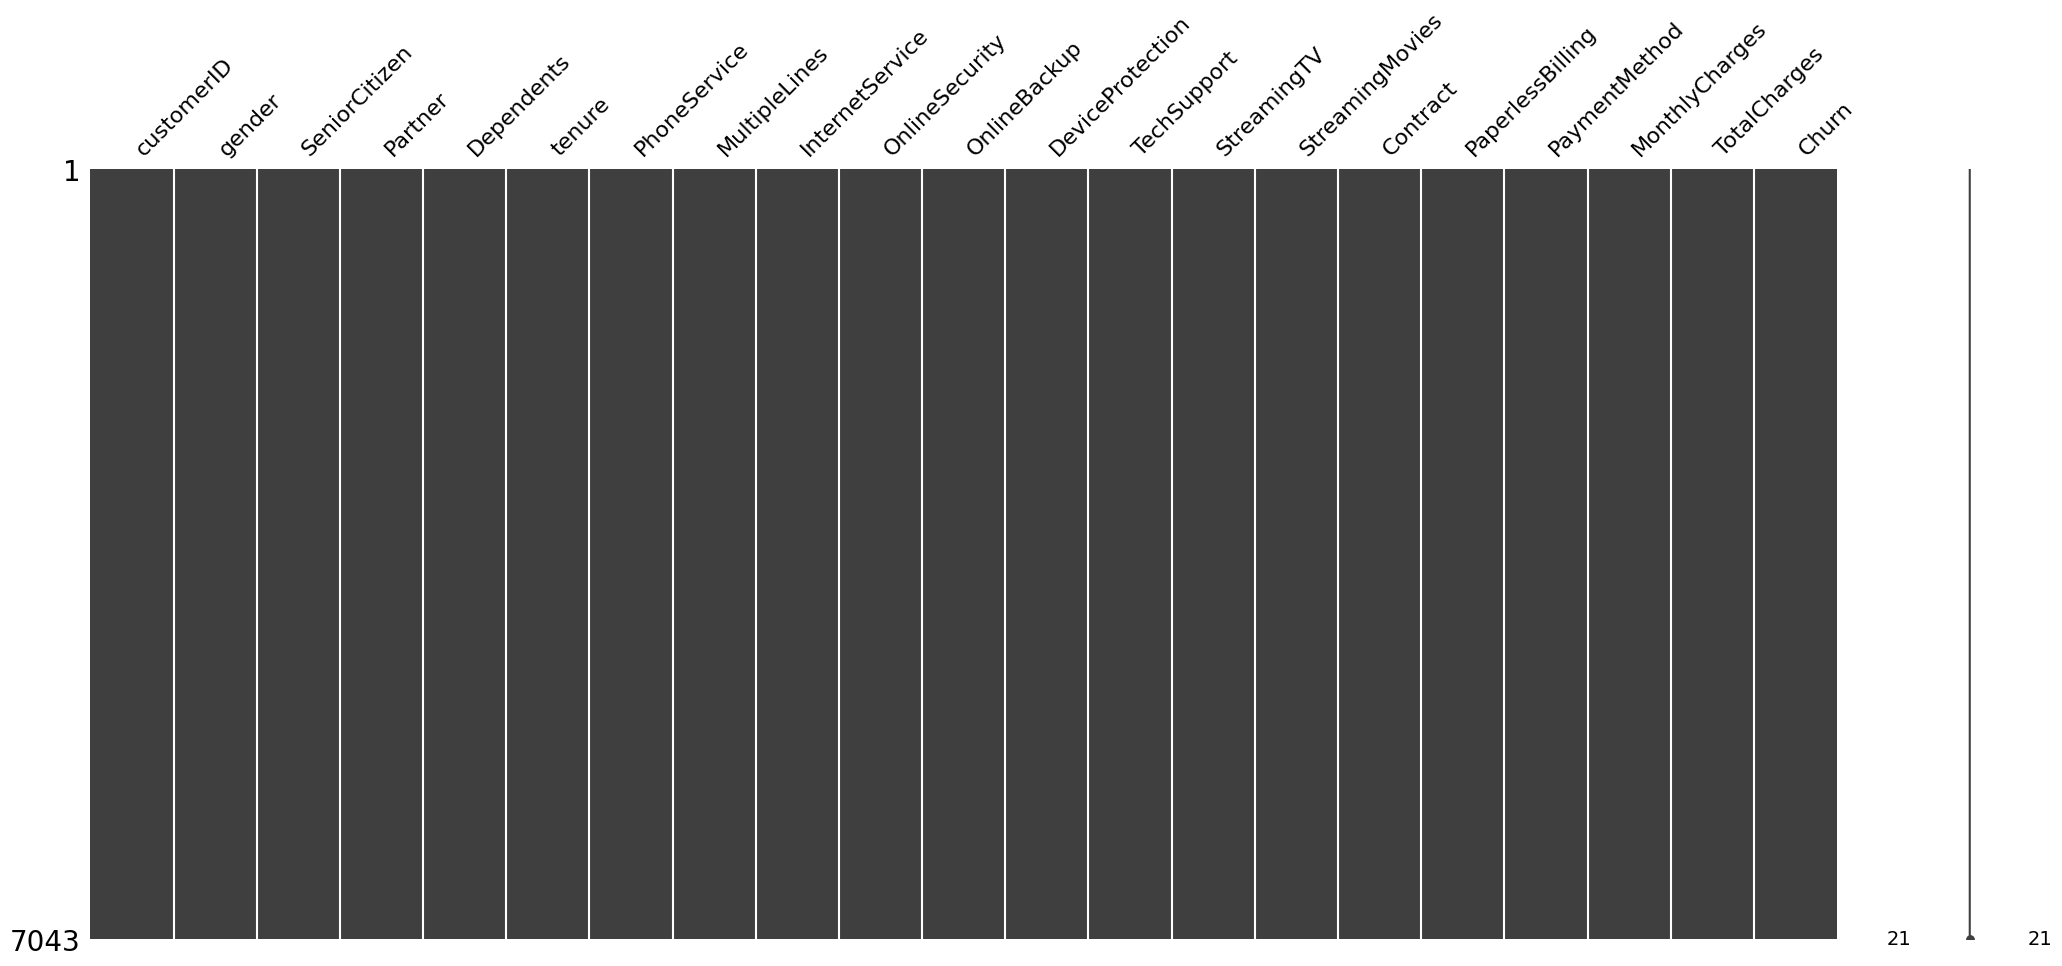

In [9]:
# Visualize missing values as a matrix
msno.matrix(df)

From the above visualisation we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.

### Data Manipulation : Here we will handle missing values, convert categorical variables to numerical, and drop unnecessary columns.



In [10]:
# drop the 'customerID' column
df.drop('customerID', axis=1, inplace=True)

In [11]:
# convert 'TotalCharges' to numeric, forcing errors to NaN  
df['TotalCharges'] = pd.to_numeric(df.TotalCharges , errors="coerce")

In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [14]:
# filter rows in a DataFrame (df) where the TotalCharges column has missing or invalid values (specifically NaN = Not a Number).
df[np.isnan(df.TotalCharges)]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
488   Bank transfer (automatic)           52.55           NaN    No  
753                Mailed check           20.25           NaN    No  
936                Mailed check           80.85           NaN    No  
1082               Mailed check           25.75           NaN    No  
1340    Credit card (automatic)           56.05           NaN    No  
3331               Mailed check           19.85           NaN    No  
3826               Mailed check           25.35           NaN    No  
4380               Mailed check           20.00           

In [15]:
df[df.tenure == 0 ].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
# lets drop all the rows with tenure is 0 as ther are not more
df.drop(labels=df[df.tenure ==0].index  , axis=0 , inplace=True)
df[df.tenure == 0 ].index

Index([], dtype='int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [18]:
# fill the total charges col with mean
df.fillna(df.TotalCharges.mean())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [19]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()


gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [20]:
df.InternetService.describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [21]:
numerical_cols =['tenure' , 'MonthlyCharges' , 'TotalCharges']

In [22]:
df[numerical_cols]


tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
2          2           53.85        108.15
3         45           42.30       1840.75
4          2           70.70        151.65
...      ...             ...           ...
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7041       4           74.40        306.60
7042      66          105.65       6844.50

[7032 rows x 3 columns]

In [35]:
[df['Churn'] == 'Yes'] == True

False

In [43]:
df[(df['gender'] == 'Female') & (df['Churn'] == 'No')].count()

gender              2544
SeniorCitizen       2544
Partner             2544
Dependents          2544
tenure              2544
PhoneService        2544
MultipleLines       2544
InternetService     2544
OnlineSecurity      2544
OnlineBackup        2544
DeviceProtection    2544
TechSupport         2544
StreamingTV         2544
StreamingMovies     2544
Contract            2544
PaperlessBilling    2544
PaymentMethod       2544
MonthlyCharges      2544
TotalCharges        2544
Churn               2544
dtype: int64

### Data Visualization

In [98]:
# Define the labels
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# add the gender pie chart and churn charts
fig.add_trace(go.Pie(labels=g_labels , values=df.gender.value_counts() ,name="Gender") , 1,1)
fig.add_trace(go.Pie(labels=c_labels , values=df.Churn.value_counts() ,name="Churn") , 1,2)

# update the pie charts
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [99]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: 2 rows, 2 columns, all of type 'domain' for pie charts
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
    subplot_titles=["Gender Distribution", "Churn Distribution",
                    "Gender (Churn = No)", "Gender (Churn = Yes)"]
)

# Add original Gender pie chart
fig.add_trace(
    go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
    row=1, col=1
)

# Add original Churn pie chart
fig.add_trace(
    go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
    row=1, col=2
)

# Add Gender pie chart for Churn = No
fig.add_trace(
    go.Pie(labels=g_labels, values=df[df['Churn'] == 'No']['gender'].value_counts(), name="Gender (No Churn)"),
    row=2, col=1
)

# Add Gender pie chart for Churn = Yes
fig.add_trace(
    go.Pie(labels=g_labels, values=df[df['Churn'] == 'Yes']['gender'].value_counts(), name="Gender (Yes Churn)"),
    row=2, col=2
)

# Update traces to make donut charts and set hover info
fig.update_traces(
    hole=0.4,
    hoverinfo="label+percent+name",
    textfont_size=16
)

# Update layout with title and annotations for each donut chart
fig.update_layout(
    title_text="Gender and Churn Distributions",
    annotations=[
        dict(text='Gender', x=0.16, y=0.78, font_size=20, showarrow=False),
        dict(text='Churn', x=0.84, y=0.78, font_size=20, showarrow=False),
        dict(text='No Churn', x=0.16, y=0.22, font_size=20, showarrow=False),
        dict(text='Yes Churn', x=0.84, y=0.22, font_size=20, showarrow=False)
    ]
)

# Show the figure
fig.show()

In [100]:
df[df.Churn == 'No'].groupby(by=df.gender).count()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
gender                                                                     
Female    2544           2544     2544        2544    2544          2544   
Male      2619           2619     2619        2619    2619          2619   

        MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
gender                                                                 
Female           2544             2544            2544          2544   
Male             2619             2619            2619          2619   

        DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
gender                                                                          
Female              2544         2544         2544             2544      2544   
Male                2619         2619         2619             2619      2619   

        PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
gender                                                                        
Female              2544           2544            2544          2544   2544  
Male                2619           2619            2619          2619   2619

In [101]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [102]:
df["Churn"].groupby(by=df.MultipleLines).count()

MultipleLines
No                  3385
No phone service     680
Yes                 2967
Name: Churn, dtype: int64

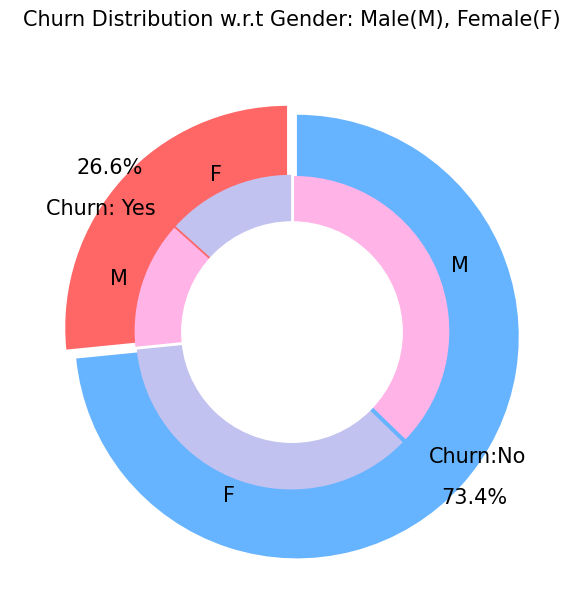

In [103]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.


In [104]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [105]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [106]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Major customers who moved out were having Electronic Check as Payment Method.
Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [107]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [108]:
df[df.gender == 'Male'][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64

In [109]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

In [110]:
# Calculate values dynamically using groupby and value_counts
churn_internet_gender = df.groupby(['Churn', 'gender', 'InternetService']).size().unstack(fill_value=0)

# Reshape data for plotting
dsl_values = [
    churn_internet_gender.loc[('No', 'Female'), 'DSL'],
    churn_internet_gender.loc[('No', 'Male'), 'DSL'],
    churn_internet_gender.loc[('Yes', 'Female'), 'DSL'],
    churn_internet_gender.loc[('Yes', 'Male'), 'DSL']
]

fiber_values = [
    churn_internet_gender.loc[('No', 'Female'), 'Fiber optic'],
    churn_internet_gender.loc[('No', 'Male'), 'Fiber optic'],
    churn_internet_gender.loc[('Yes', 'Female'), 'Fiber optic'],
    churn_internet_gender.loc[('Yes', 'Male'), 'Fiber optic']
]

no_internet_values = [
    churn_internet_gender.loc[('No', 'Female'), 'No'],
    churn_internet_gender.loc[('No', 'Male'), 'No'],
    churn_internet_gender.loc[('Yes', 'Female'), 'No'],
    churn_internet_gender.loc[('Yes', 'Male'), 'No']
]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
    y=dsl_values,
    name='DSL'
))

fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
    y=fiber_values,
    name='Fiber optic'
))

fig.add_trace(go.Bar(
    x=[['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
    y=no_internet_values,
    name='No Internet'
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [111]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [112]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

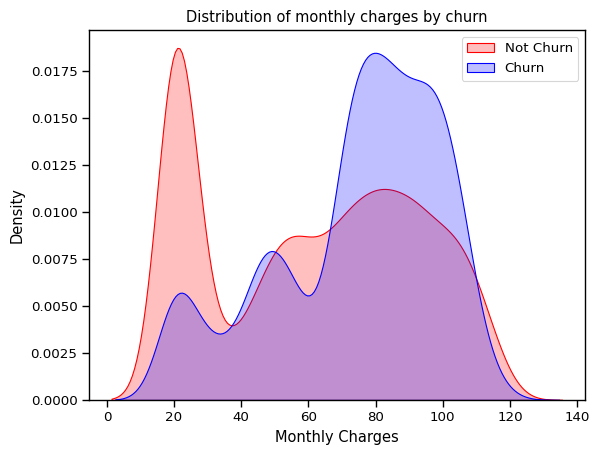

In [113]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

In [114]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

New customers are more likely to churn

The image you provided is a correlation heatmap, which visualizes the correlation coefficients between various features in a dataset, likely related to customer churn analysis (e.g., from a telecom dataset). A correlation coefficient measures how strongly two variables are related, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation. The heatmap uses colors to represent these values, with a color bar on the right showing the scale from -1.0 (blue) to 1.0 (red).

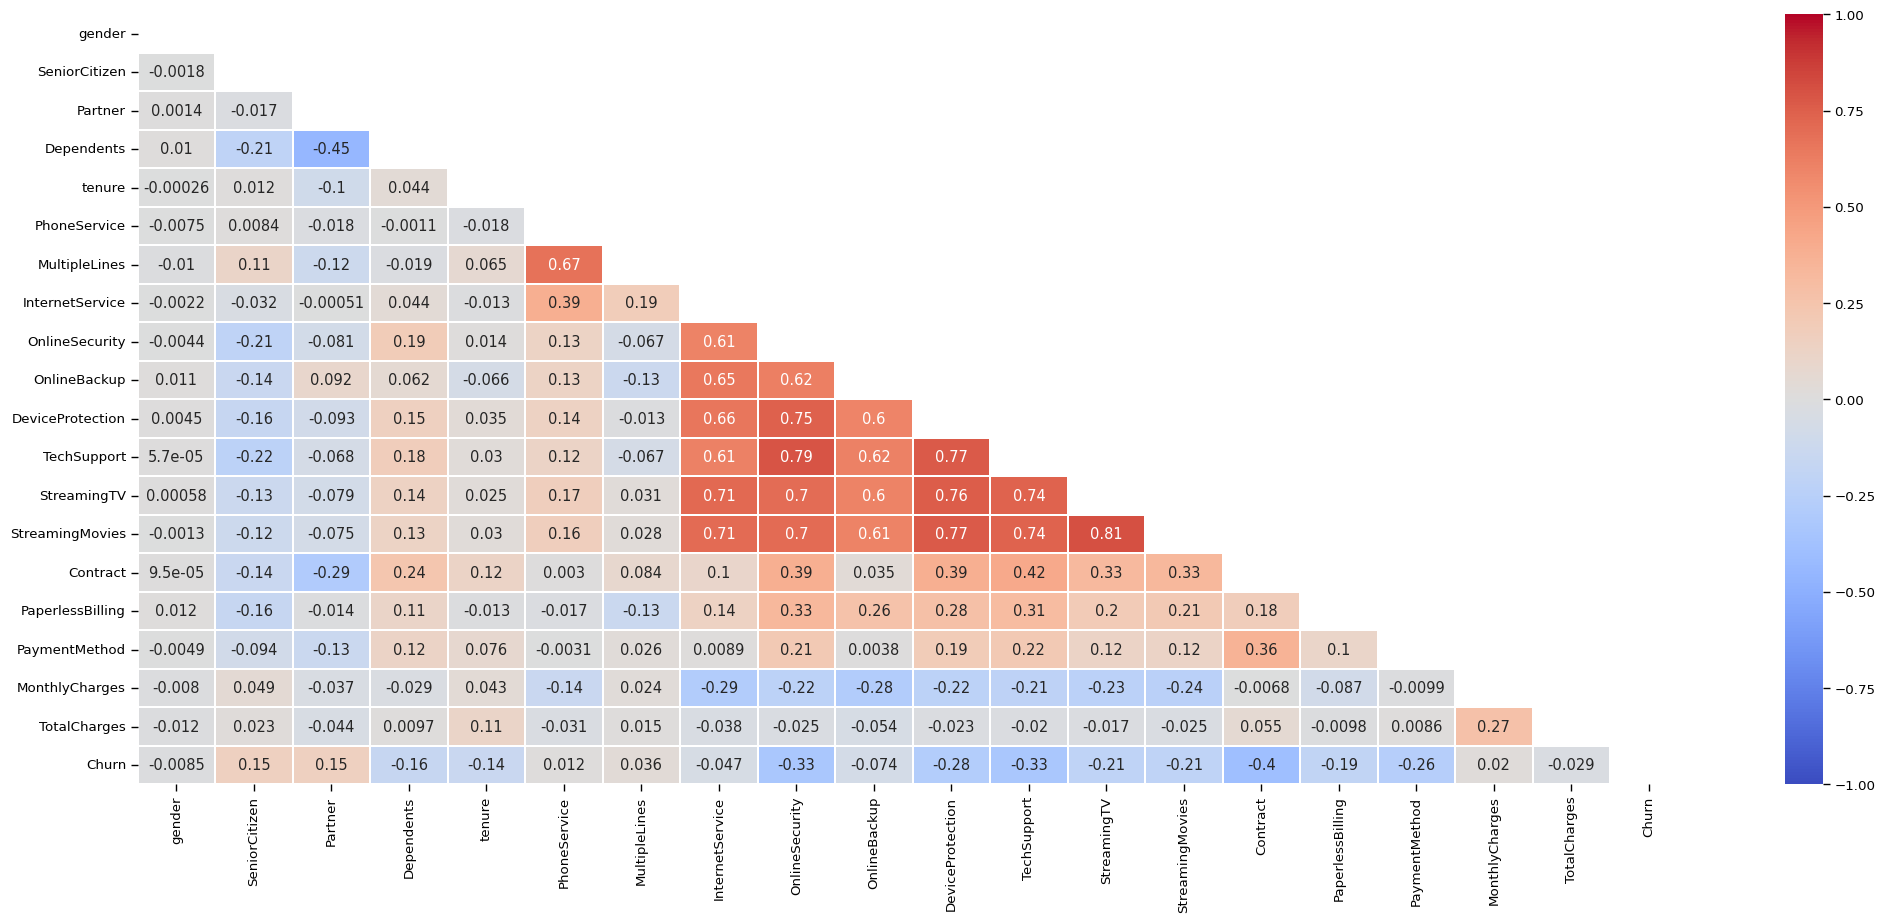

In [97]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Data Preprocessing

Python function object_to_int that converts a pandas Series (a column from a DataFrame) containing object-type data (typically strings or categorical data) into integer values using LabelEncoder from the scikit-learn library. This is commonly used in machine learning to transform categorical variables into a numerical format that models can process. Let’s break it down simply

In [115]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [116]:
# This pandas method applies a function along either the rows or columns (by default, it operates column-wise).

# This will run the fn for each col

df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [ ]:
# Check the corelation with churn
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

Perpare the dataset

In [121]:
X = df.drop(columns = ['Churn']) 
y = df['Churn'].values

In [122]:
# Sets a seed for the random number generator, ensuring the split is reproducible. Using the same random_state value (e.g., 40) will produce the same split every time.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [123]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

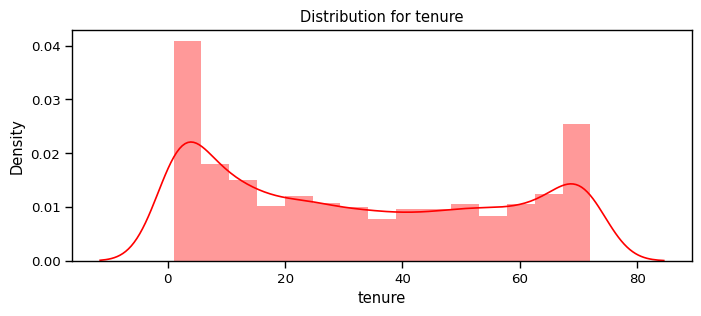

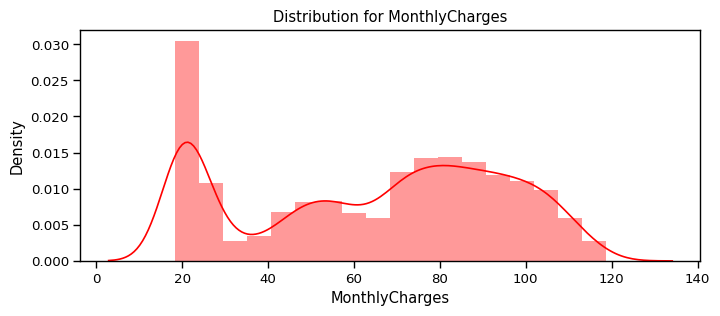

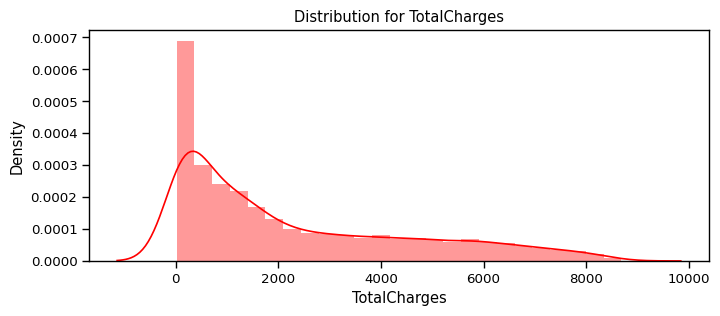

In [124]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

Here as the data are distributet normally we can use standerization to scale the data. Standardization is a common preprocessing step in machine learning that transforms the features to have a mean of 0 and a standard deviation of 1. This is particularly useful when the features have different units or scales, as it helps improve the performance of many machine learning algorithms.

In [127]:
# Here keep in mind we do not standerize the full df , we get only the numerical cols

df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)

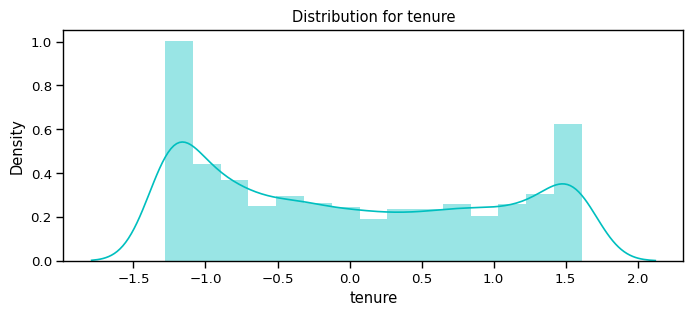

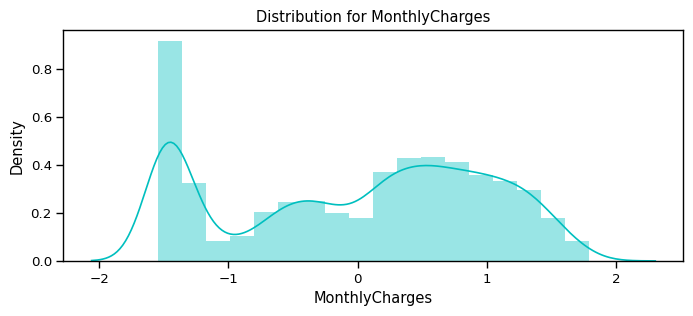

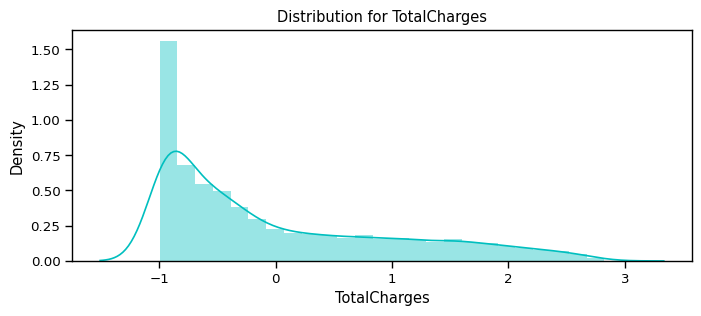

In [128]:
for feat in numerical_cols: distplot(feat, df_std, color='c')

The code categorizes the columns of X_train into three groups:

1. Numeric columns (num_cols): Left as is (assumed to be predefined).
2. One-hot encoded columns (cat_cols_ohe): Columns like PaymentMethod, Contract, and InternetService that will be expanded into multiple binary columns.
3. Label encoded columns (cat_cols_le): Remaining categorical columns (not numeric and not in cat_cols_ohe) that will be converted to integers.

In [129]:
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

In [ ]:
# One hot encoded colms
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService']

In [ ]:
# Lable encodede colms
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

### fit_transform and transform 
- fit: Computes the mean and standard deviation of each numeric column in X_train.
- transform: Applies the standardization (subtracts the mean and divides by the standard deviation) to scale the data.
- Applies the same scaling (using the mean and standard deviation learned from X_train) to X_test.

In [134]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Machine Learning Model Evaluations and Predictions

1. KNN - K Nearest Neighbors
K-Nearest Neighbors (KNN) is a simple and popular machine learning algorithm used for both classification and regression tasks. It’s a type of supervised learning where the model makes predictions based on the similarity of new data points to existing data points in the training set.

How It Works:

1. KNN stores all the training data.
2. When a new data point needs a prediction, it finds the k closest data points (neighbors) in the training set based on a distance metric (e.g., Euclidean distance).
3. For classification: It assigns the class that is most common among the k neighbors (majority voting).
4. For regression: It takes the average (or weighted average) of the target values of the k neighbors.
5. The value of k (number of neighbors) is a hyperparameter you choose, typically an odd number to avoid ties in classification.

In [141]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)

print("Actual:", y_test)
print("Predicted:", predicted_y)
print("KNN accuracy:",accuracy_knn)

Actual: [0 0 0 ... 1 0 0]
Predicted: [0 0 0 ... 1 1 0]
KNN accuracy: 0.776303317535545


In [142]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



Introduction to Support Vector Classifier (SVC)

Support Vector Classifier (SVC) is a type of Support Vector Machine (SVM) used for classification tasks. SVM is a supervised learning model that finds the hyperplane which best separates the data points of different classes in a high-dimensional space. The main goal of SVM is to maximize the margin between the hyperplane and tahe nearest data points (support vectors) from any class.

In [143]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [144]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



**Random Forest** is a popular ensemble machine learning algorithm used for both classification and regression tasks. It builds multiple decision trees during training and combines their predictions to improve accuracy and reduce overfitting. Let’s break it down simply.

How It Works (Step-by-Step)

**1. Create Multiple Decision Trees:**  
A decision tree splits data into branches based on feature values (e.g., if Tenure > 12, go left; else, go right) to predict an outcome (e.g., Churn = Yes or No).  
Random Forest grows many trees (e.g., 100 or 500) instead of just one.

**2. Bootstrap Sampling (Bagging):**  
For each tree, a random sample of the training data is taken with replacement (called bootstrapping). This means some data points might be used multiple times, and others might not be used at all.  
*Example:* If you have 1000 customers, each tree might train on a random subset of 1000, with some customers repeated.

**3. Random Feature Selection:**  
At each split in a tree, only a random subset of features (e.g., 3 out of 10) is considered, rather than all features. This adds diversity among the trees.  
*Example:* For a split, it might only look at Tenure and MonthlyCharges, ignoring Gender.

**4. Build Each Tree:**  
Each tree is grown to its maximum depth (fully expanded) without pruning, which means it can overfit its subset of data. This is okay because the forest will average out the errors.

**5. Make Predictions:**  
- **For Classification:** Each tree votes for a class (e.g., "Yes" or "No" for churn). The class with the most votes across all trees is the final prediction.
- **For Regression:** Each tree predicts a number (e.g., a churn probability), and the average of all tree predictions is the final output.  
*Example:* If 70 trees say "No" and 30 say "Yes" (out of 100), the prediction is "No".

**6. Combine Results:**  
The forest combines the predictions from all trees to produce a single, more accurate result. This reduces the risk of overfitting compared to a single decision tree.

In [146]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "sqrt",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


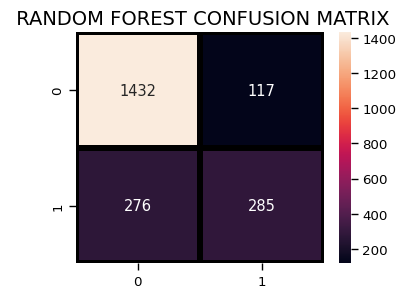

In [147]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

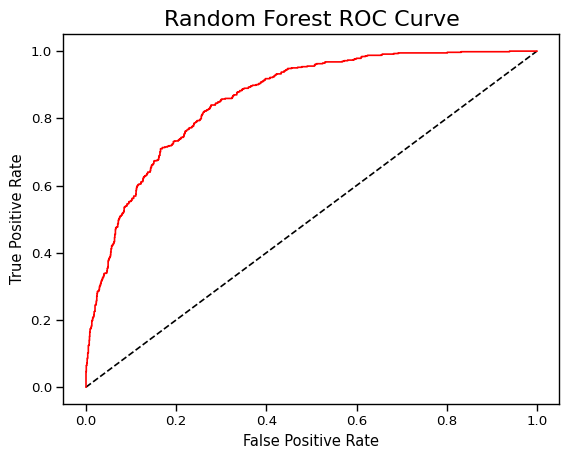

In [148]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

In [149]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [150]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.80      0.81      0.80      2110



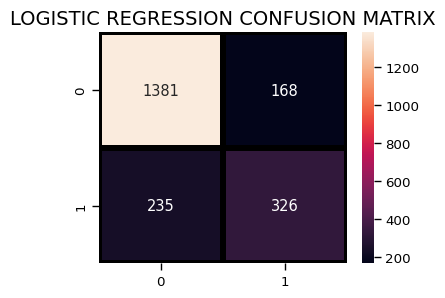

In [151]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**DecisionTreeClassifier**

What it does: Builds a tree-like model that makes decisions by splitting data based on feature values (e.g., if Tenure > 12, predict "No" churn; else, "Yes"). It predicts the class (e.g., churn or not) for new data by following the tree’s branches.
Simple Idea: Like a flowchart, it asks yes/no questions about features to reach a decision.

In [152]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7312796208530805


**AdaBoostClassifier:**

What it does: Combines many weak decision trees (models that are only slightly better than random guessing) into a strong classifier. It focuses more on correcting mistakes by giving higher weight to misclassified data points in each round.
Simple Idea: It boosts weak learners by learning from their errors, improving prediction step by step.

In [153]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.8127962085308057

**GradientBoostingClassifier**

What it does: Builds decision trees sequentially, where each tree corrects the errors of the previous ones using gradient descent (a math technique to minimize errors). It creates a powerful model by combining these trees.
Simple Idea: It refines predictions by adding trees that fix the mistakes of earlier trees, like stacking improvements.

In [154]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.8075829383886256


**VotingClassifier**

What it does: Takes predictions from multiple different models (e.g., DecisionTree, KNN) and makes a final decision by majority voting (for classification) or averaging (for probabilities). It combines the strengths of diverse models.
Simple Idea: Like a group vote, it lets several models decide together for a better overall prediction.

In [156]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.8161137440758294


Summary

- DecisionTreeClassifier: Single tree-based decision maker.
- AdaBoostClassifier: Boosts weak trees by focusing on errors.
- GradientBoostingClassifier: Builds trees sequentially to fix errors.
- VotingClassifier: Combines multiple models’ votes for a final decision.